# Nuages de mots

## Imports et stopwords

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

In [57]:
# Stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem" , "etc" , "mod", "bel" , "ruo", "adr", "ecr", "aveo", "app"
       , "gar","bx","dos", "wai","pet", "dés", "fer" , "sal" , "com"]
sw = set(sw)


## fichier contenant le texte de tous les journaux d'une année 1925

In [58]:
# Choisir une année
year = 1925

In [ ]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

In [60]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [ ]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

In [62]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [64]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'12-3 JANVIER 1925. « LE SOI B C J VÉRITABLE REMÈDE DE LA FAMILLE LES Pastilles VALDA SONT INDISPENSABLES à ÎTOANT, au 1ERE, à la MÈRE comme aux GRANDS PARENTS, pour PRÉSERVE** LEURS ORGANES RESPIRATOIRES ou. pour SOIGNER les RHUMES, MAUX de GORGE, LARYNGITES, BRONCHITES, GRIPPE, INFLUENÇA, ASTHME, EMPHYSÈME, «te, MAIS IL FAUT AVOIR BIEN SOIN DS n’empïoyor crue tes Pastilles VALDA véritables vendues seulement en BOITES do 3 Fr. portant le nom VÂIDÂ arrmiriiciiçr iA VENDRE. lhjUe Toiture AviullUvi'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [51]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année 1925

In [ ]:
clean_text(year, folder=temp_path)

In [ ]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

## Nuage de mots

### Afficher les termes les plus fréquents


In [ ]:
frequencies = Counter(after.split()) #after par before
print(frequencies.most_common(10))

### Créer, stocker et afficher le nuage de mots

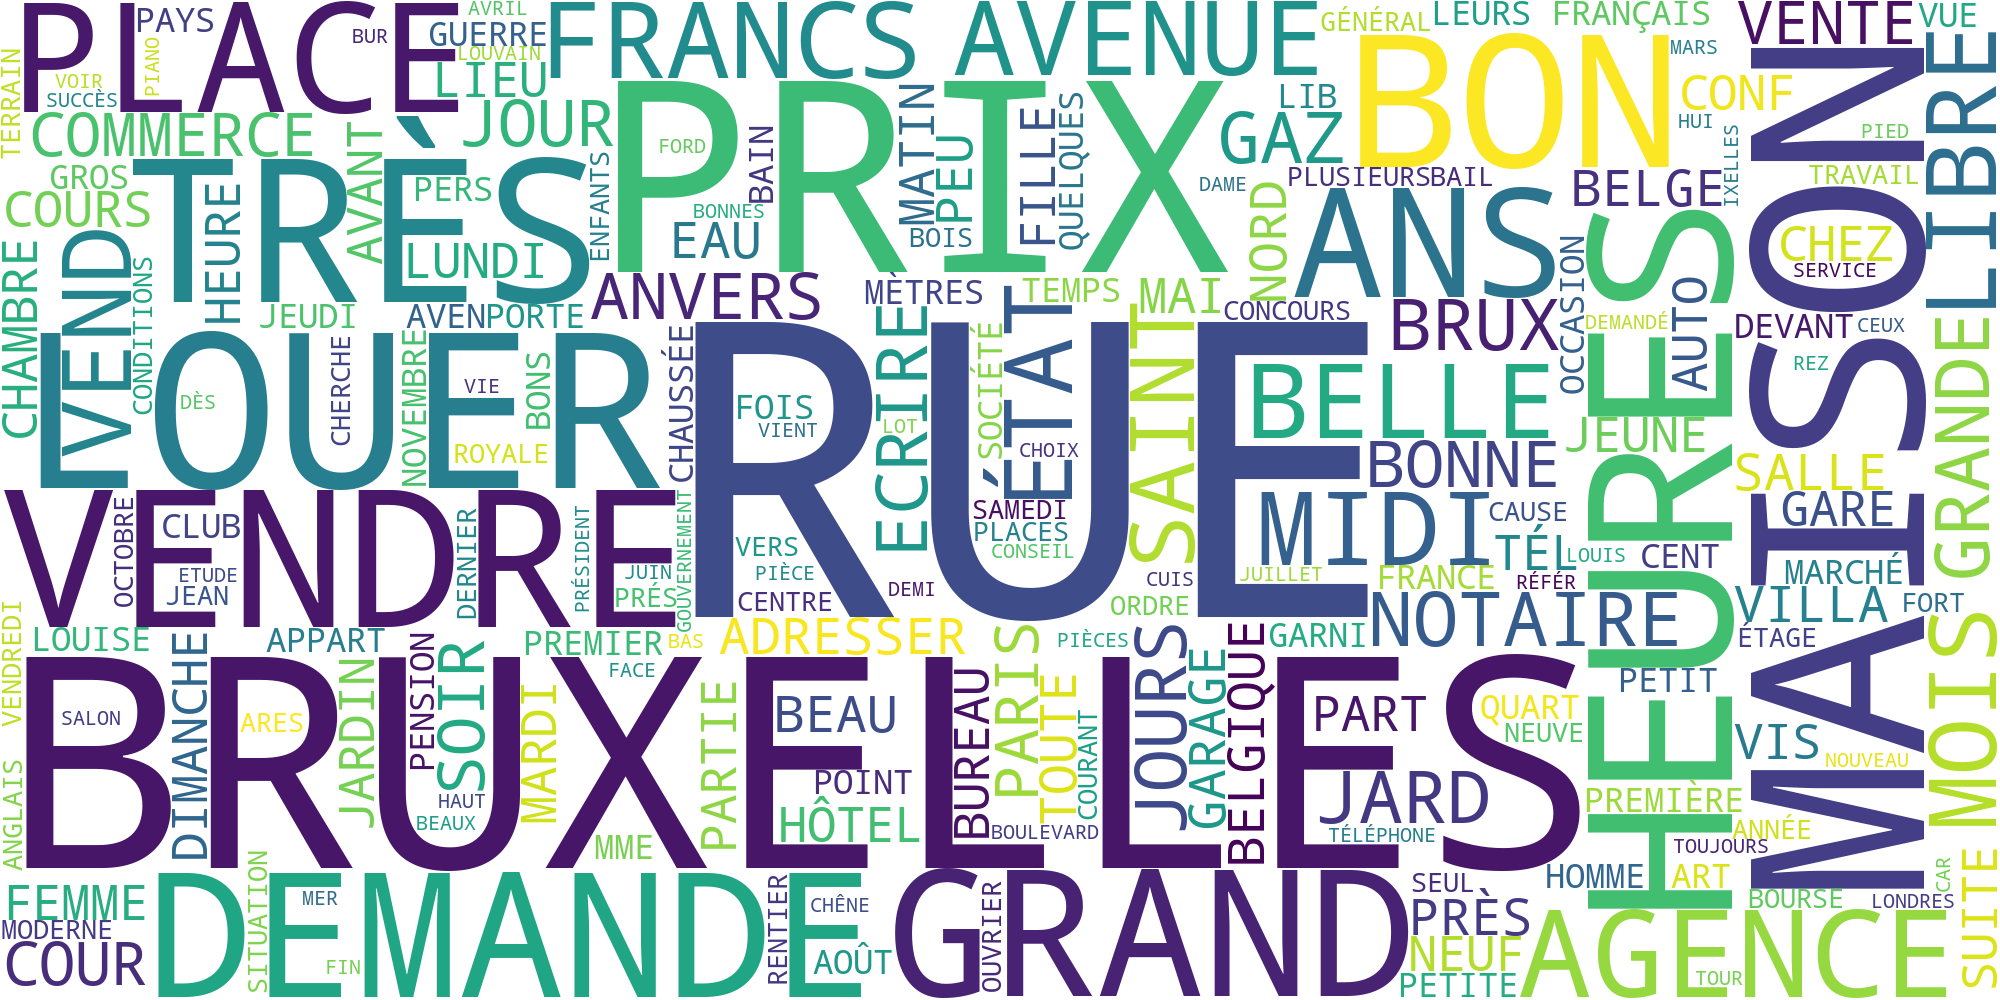

In [67]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))